In [157]:
from qutip import * # qutip == 5.0.4
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Hamiltonian
$$\begin{align}​
H(t) &= \sum_{i = j}^{n} \frac{\Omega_j(t)}{2} |1\rangle_j {}_j\langle r| + \text{h.c.} \\​
&+ \sum_{j <> k} B_{jk} |rr\rangle_{jk} {}_{jk}\langle rr|.​
\end{align}$$

# the Two Qubit System with Infinte Blockade Strength

In [158]:
N = 99 # number of time steps
dim = 4 
basis = [basis(dim,i) for i in range(dim)] # basis states
# in the basis of |01>, |0r>, |11>, |W>=(|1r>+|r1>)/sqr2

method = 'BFGS'


Omega_max = 1 # fix maximum Omega
T_max = 10.0 # maximum time
T_sample = 10.0

T_list = np.linspace(0, T_max, 100)

# Initialize the state
psi_in = Qobj([1,0,1,0]) # |psi(0)> = |0>|1> + |1>|1> 



In [159]:
T = T_sample # Set the time for the simulation
t_step = T/N # time step

phi = np.random.uniform(0, 2 * np.pi, size=N)

def get_H(phi):
    sqrt2 = np.sqrt(2)
    Omega = Omega_max*np.exp(phi)# Global Pulse so Omega_1 = Omega_2 = Omega

    H = np.zeros((4,4)) # Hamiltonian matrix
    # in the basis of |01>, |0r>,|11>,|W>=(|1r>+|r1>)/sqr2
    H_list = [] # List to store Hamiltonian matrices
    
    for i in range(N):
        H[0,1] = Omega[i]/2 
        H[1,0] = Omega[i]/2
        H[2,3] = Omega[i]/sqrt2
        H[3,2] = Omega[i]/sqrt2
        
        H_operator = Qobj(H) # Convert to Qobj
        H_list.append(H_operator) # Append to the list
    return H_list # Return the list of Hamiltonian matrices

def get_U(phi):
    # Define the unitary operator
    H_list = get_H(phi) # Get the Hamiltonian list
    U_total = qeye(H_list[0].dims[0]) # Initialize the total unitary operator
    for i in range(len(H_list)):
        H_i = H_list[i]               # Calculate the Hamiltonian for the current time step
        U_i = (-1j * H_i * dt).expm() 
        U_total = U_i * U_total
    return U_total # Return the total unitary operator

def get_fidelity(phi):
    # use the average fidelity fomula
    U = get_U(phi)
    
    a01 = basis[0].dag() * U * psi_in 
    a11 = -basis[2].dag() * U * psi_in 

    F = (0.05) * (np.abs(1+2*a01+a11)**2 + 1 +2*np.abs(a01)**2 + np.abs(a11)**2 )
    return F # Return the fidelity

def objective_function(phi):
    # Objective function to minimize
    return 1-get_fidelity(phi) 


    

In [160]:
result = minimize(objective_function, phi, method=method, options={'disp': True})
print("Optimized phi:", result.x)
print("1-F:", result.fun)

Optimization terminated successfully.
         Current function value: 0.638486
         Iterations: 5
         Function evaluations: 1100
         Gradient evaluations: 11
Optimized phi: [1.04226763 6.31366915 2.58048501 4.91194391 1.30541677 1.30448284
 5.96079321 3.08824542 4.37879542 4.10175132 1.93268711 2.32353076
 2.20619911 1.06669492 2.86397827 1.80632341 2.51791221 3.82439011
 0.97014625 3.44841616 4.21642521 1.487247   1.79162055 3.13769979
 4.51818976 2.30733461 0.81578504 1.90660539 5.90717568 4.19602382
 0.28322983 0.49334539 4.65265543 6.03571868 1.7248641  5.09157987
 1.4406056  5.28031748 1.88703679 0.4201297  5.45435181 0.81464875
 1.44442311 4.00806378 3.7123455  6.22293173 3.05722926 2.85362824
 2.79066171 1.92574086 4.3844424  6.24549338 3.36211854 3.43456093
 3.42018904 0.48648326 6.2647807  4.83660322 0.65763288 0.05951609
 4.07361426 4.1358661  6.57822756 3.43741486 6.15211587 3.71713519
 3.41423141 6.06010735 4.03209126 4.95161119 1.04079514 5.2778158
 3.582436

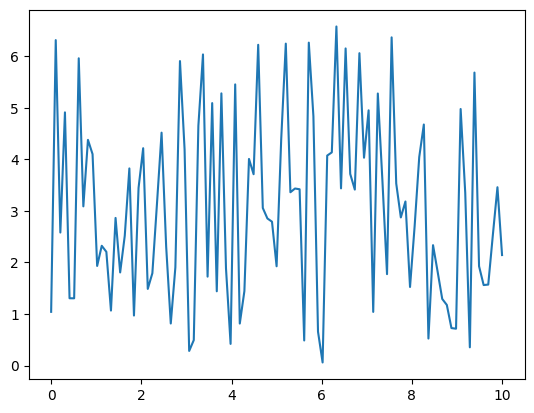

In [161]:
t_plot = np.linspace(0, T_max, N)
phi_plot = result.x
plt.plot(t_plot, phi_plot, label='Optimized Phase')
plt.show()

In [ ]:
def get_Optimal(T):
    dt = T/N
    phi = np.random.uniform(0, 2 * np.pi, size=N)
    result = minimize(objective_function, phi, method=method, options={'disp': True})

    return result.fun, result.x

objecctive_function_list = []

for T in T_list:
    objecctive_function_list.append(get_Optimal(T)[0])


In [ ]:
plt.plot(T_list, objecctive_function_list, label='Objective Function')
plt.xlabel('T $\Omage_{max}$')
plt.ylabel('1-F')